In [224]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [225]:
# Load data from API
response = requests.get('https://gbfs.baywheels.com/gbfs/en/station_status.json')
jason_data = response.json()

In [226]:
#print(json.dumps(data, indent=4))

In [227]:
stations = pd.DataFrame(jason_data["data"]["stations"])
stations.head()

,is_returning,is_installed,station_id,station_status,num_bikes_available,legacy_id,is_renting,last_reported,num_ebikes_available,num_docks_disabled,eightd_has_available_keys,num_bikes_disabled,num_docks_available,num_scooters_available,num_scooters_unavailable
0,1,1,c53990d7-f965-40f4-b305-3435e1c95a71,active,0,404,1,1683175692,0,0,False,0,19,NaN,NaN
1,1,1,46b4ef45-b06b-40eb-9fdf-9bc8ff104a4f,active,0,299,1,1683175694,0,0,False,0,14,NaN,NaN
2,1,1,ab8cc22e-0f34-4476-bf81-293cbbb2e69c,active,12,395,1,1683175715,0,0,False,0,15,0.0,0.0
3,1,1,d75591d7-080d-46cb-8ada-0fbe6af676fc,active,13,422,1,1683175711,4,0,False,0,10,0.0,0.0
4,1,1,30429aed-9a47-4fd9-87fa-0db835aa8265,active,6,418,1,1683175731,0,0,False,0,13,0.0,0.0


In [228]:
stations.columns

Index(['is_returning', 'is_installed', 'station_id', 'station_status',
       'num_bikes_available', 'legacy_id', 'is_renting', 'last_reported',
       'num_ebikes_available', 'num_docks_disabled',
       'eightd_has_available_keys', 'num_bikes_disabled',
       'num_docks_available', 'num_scooters_available',
       'num_scooters_unavailable'],
      dtype='object')

In [229]:
stations.describe()

,is_returning,is_installed,num_bikes_available,is_renting,last_reported,num_ebikes_available,num_docks_disabled,num_bikes_disabled,num_docks_available,num_scooters_available,num_scooters_unavailable
count,516.000000,516.000000,516.000000,516.000000,5.160000e+02,516.000000,516.000000,516.000000,516.000000,503.0,503.0
mean,0.996124,0.996124,10.428295,0.996124,1.683117e+09,3.153101,0.279070,0.304264,11.062016,0.0,0.0
std,0.062197,0.062197,5.572182,0.062197,9.421154e+05,4.195445,0.887687,0.661318,6.423866,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,1.666282e+09,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,1.000000,1.000000,7.000000,1.000000,1.683176e+09,0.000000,0.000000,0.000000,6.000000,0.0,0.0
50%,1.000000,1.000000,10.000000,1.000000,1.683176e+09,1.000000,0.000000,0.000000,11.000000,0.0,0.0
75%,1.000000,1.000000,14.000000,1.000000,1.683176e+09,5.000000,0.000000,0.000000,16.000000,0.0,0.0
max,1.000000,1.000000,34.000000,1.000000,1.683176e+09,21.000000,15.000000,4.000000,40.000000,0.0,0.0


In [230]:
sorted_stations = stations.sort_values(by='num_bikes_available', ascending=True)
sorted_stations

,is_returning,is_installed,station_id,station_status,num_bikes_available,legacy_id,is_renting,last_reported,num_ebikes_available,num_docks_disabled,eightd_has_available_keys,num_bikes_disabled,num_docks_available,num_scooters_available,num_scooters_unavailable
0,1,1,c53990d7-f965-40f4-b305-3435e1c95a71,active,0,404,1,1683175692,0,0,False,0,19,NaN,NaN
260,1,1,7d15210b-55fb-4456-8281-781cfa9d5594,active,0,560,1,1683175771,0,1,False,0,15,NaN,NaN
256,1,1,1774487681060536806,active,0,1774487681060536806,1,1683175774,0,1,False,0,18,NaN,NaN
203,1,1,7dfe1c94-5eae-41a7-ad42-3d3f4c7610a3,active,0,502,1,1683175777,0,0,False,0,24,NaN,NaN
275,1,1,76d7eeec-413a-4940-9bc2-8222d35f8fdc,active,0,166,1,1683175700,0,0,False,0,15,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1,1,6977a0c8-f59f-4d97-9868-e7b20cc2fdad,active,24,182,1,1683175732,0,0,False,0,6,0.0,0.0
212,1,1,ed438146-1615-45c6-bf54-07e2de0adcf1,active,24,384,1,1683175793,12,0,False,1,2,0.0,0.0
215,1,1,a5c3e383-f1b0-449f-8ad4-96291f38c636,active,25,510,1,1683175789,8,0,False,0,6,0.0,0.0
185,1,1,c2169cbb-4ff3-405a-a656-729171b13d47,active,25,541,1,1683175702,2,0,False,0,6,0.0,0.0


In [231]:
# Get the top 20 stations with too few bikes
few_bikes = sorted_stations.nsmallest(20, 'num_bikes_available')

In [232]:
# Get the top 20 stations with too many bikes
more_bikes = sorted_stations.nlargest(20, 'num_bikes_available')

In [233]:
# Print the list of stations with too few bikes
print("Stations with too few bikes: ") 
print (few_bikes[['station_id', 'num_bikes_available', 'num_docks_available']].to_string(index=False))

Stations with too few bikes: 
                          station_id  num_bikes_available  num_docks_available
c53990d7-f965-40f4-b305-3435e1c95a71                    0                   19
7d15210b-55fb-4456-8281-781cfa9d5594                    0                   15
                 1774487681060536806                    0                   18
7dfe1c94-5eae-41a7-ad42-3d3f4c7610a3                    0                   24
76d7eeec-413a-4940-9bc2-8222d35f8fdc                    0                   15
a4ea165b-5dcf-4b41-ac2d-68718f98b147                    0                   19
a646ab7e-7396-4009-abb8-0b51171325ff                    0                   29
40205ede-0c43-44ab-8c9c-0d8ecd9f854e                    0                    2
64ce6633-9ea3-4dc1-b33f-c9d14c523a6a                    0                   17
318b8d9d-cf10-41a5-988a-860a07f0543d                    0                   19
ce264eb5-ebfe-4a03-8bd3-e319c32614ec                    0                   24
906d869e-f513-4c60-ab7

In [234]:
# Print the list of stations with too many bikes
print("Stations with too many bikes: ") 
print (more_bikes[['station_id', 'num_bikes_available','num_docks_available']].to_string(index=False))

Stations with too many bikes: 
                          station_id  num_bikes_available  num_docks_available
dc2f7685-c3e3-4536-b78b-740479cbb207                   34                    1
a5c3e383-f1b0-449f-8ad4-96291f38c636                   25                    6
c2169cbb-4ff3-405a-a656-729171b13d47                   25                    6
54c91186-8493-44d1-ac4f-435350fee797                   24                    5
6977a0c8-f59f-4d97-9868-e7b20cc2fdad                   24                    6
ed438146-1615-45c6-bf54-07e2de0adcf1                   24                    2
a40fc1eb-e8e9-4d41-8f77-71365f0d9064                   23                    0
93d95ded-d49e-43bc-b7fe-6ce556569088                   23                    2
7655722c-16c0-4996-9d92-4848ece2fc35                   23                    9
e82e7160-d8fb-452b-8f27-c0f75926d080                   23                    0
d6c452d5-88d5-48e2-8028-d46134c2beb8                   23                    4
44647200-5fea-47fc-a6

In [235]:
# Calculate percentage of bikes available relative to the total number of bike docks
few_bikes['percent_available'] = (few_bikes['num_bikes_available'] / few_bikes['num_docks_available']).round(2)

In [236]:
few_bikes['percent_available']

0      0.00
260    0.00
256    0.00
203    0.00
275    0.00
394    0.00
191    0.00
91     0.00
391    0.00
157    0.00
193    0.00
353    0.00
1      0.00
98     0.00
35     0.10
265    0.05
52     0.04
381    0.02
223    0.06
427    0.06
Name: percent_available, dtype: float64

In [240]:
# Calculate percentage of bikes available relative to the total number of bike docks
more_bikes['percent_available'] = (more_bikes['num_bikes_available'] / more_bikes['num_docks_available']).round(2)
more_bikes['percent_available']

12     34.00
215     4.17
185     4.17
462     4.80
360     4.00
212    12.00
300      inf
65     11.50
402     2.56
350      inf
16      5.75
220     3.83
13       inf
45       inf
128    11.50
201     1.69
226    11.00
103      inf
15     10.50
346    10.50
Name: percent_available, dtype: float64

C:\Users\vijay\AppData\Local\Temp\ipykernel_1640\286521408.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(stations_to_plot['station_id'], rotation=90)


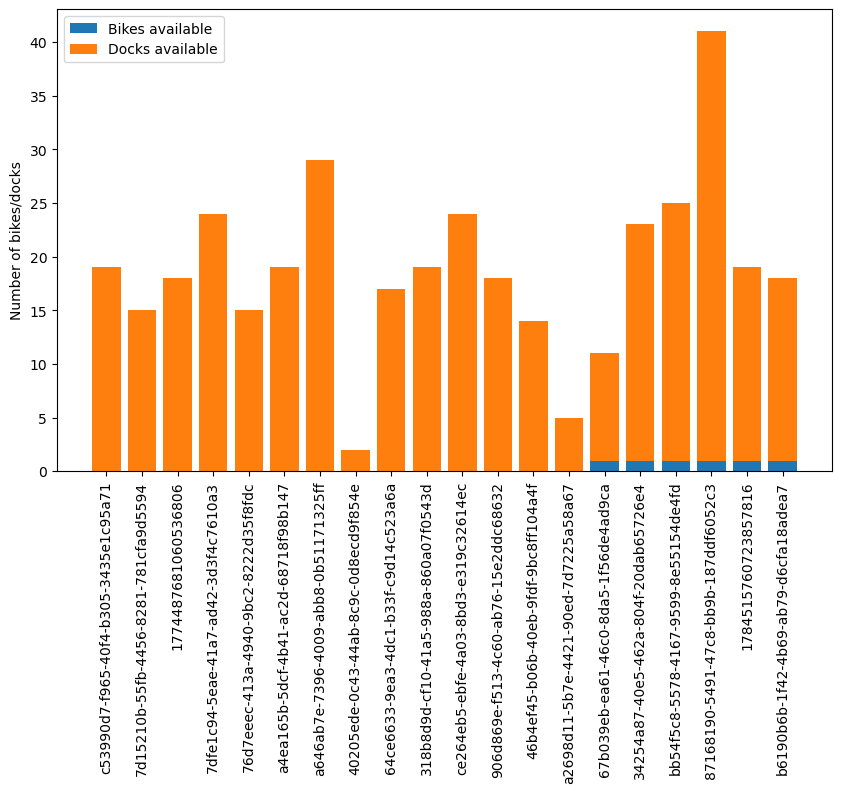

In [238]:
# Select the stations to plot
stations_to_plot = few_bikes

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(stations_to_plot['station_id'], stations_to_plot['num_bikes_available'], label='Bikes available')
ax.bar(stations_to_plot['station_id'], stations_to_plot['num_docks_available'], bottom=stations_to_plot['num_bikes_available'], label='Docks available')
ax.set_ylabel('Number of bikes/docks')
ax.set_xticklabels(stations_to_plot['station_id'], rotation=90)
ax.legend()
plt.show()


C:\Users\vijay\AppData\Local\Temp\ipykernel_1640\2990832576.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(stations_to_plot['station_id'], rotation=90)


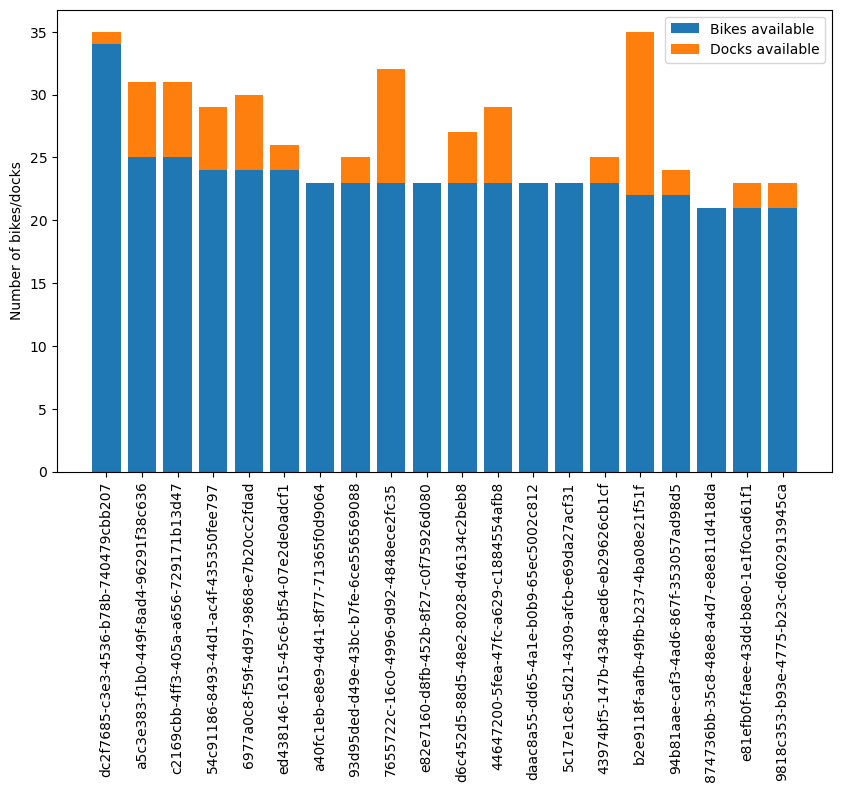

In [239]:
# Select the stations to plot
stations_to_plot = more_bikes

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(stations_to_plot['station_id'], stations_to_plot['num_bikes_available'], label='Bikes available')
ax.bar(stations_to_plot['station_id'], stations_to_plot['num_docks_available'], bottom=stations_to_plot['num_bikes_available'], label='Docks available')
ax.set_ylabel('Number of bikes/docks')
ax.set_xticklabels(stations_to_plot['station_id'], rotation=90)
ax.legend()
plt.show()

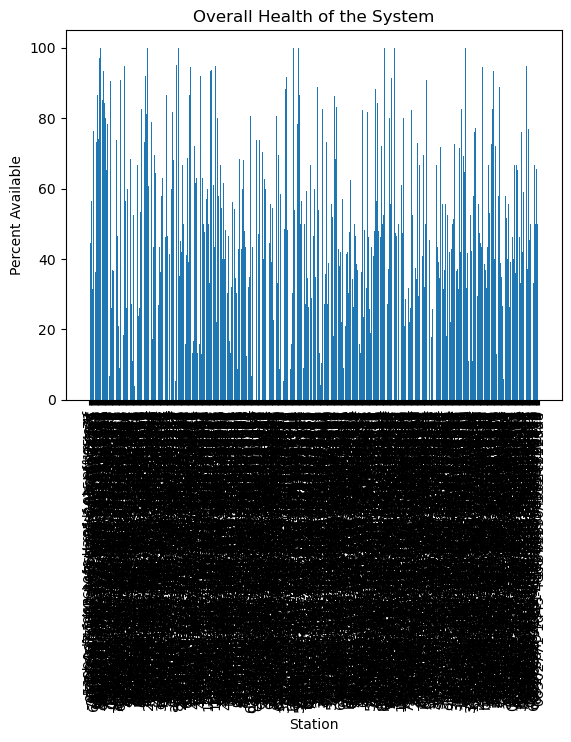

In [243]:
# Calculate the percentage of available bikes at each station
total_bikes = stations['num_bikes_available'] + stations['num_docks_available']
percent_available = stations['num_bikes_available'] / total_bikes * 100

# Create a bar chart
plt.bar(stations['station_id'], percent_available)

# Set the chart title and labels
plt.title("Overall Health of the System")
plt.xlabel("Station")
plt.ylabel("Percent Available")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.show()

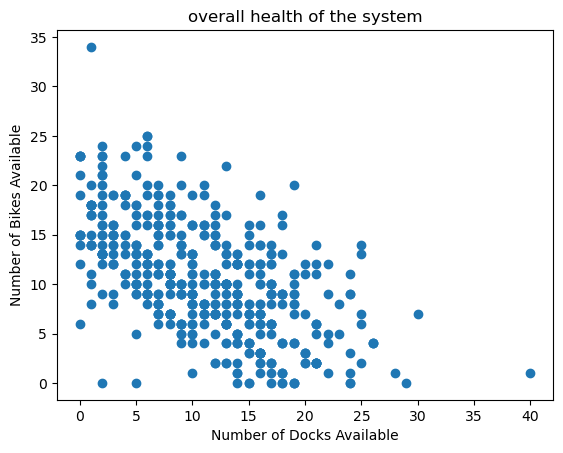

In [247]:
# create a scatter plot of num_bikes_available vs. num_docks_available for each station
plt.scatter(stations['num_docks_available'], stations['num_bikes_available'])

# set the title and axis labels
plt.title('overall health of the system')
plt.xlabel('Number of Docks Available')
plt.ylabel('Number of Bikes Available')

# show the plot
plt.show()